# ** **Sentiment Analysis of Indian Politics Tweets Using Logistic Regression and Data Visualization Techniques** -**
Performed sentiment analysis on Indian political tweets using Logistic Regression and CountVectorizer.

Import Necessary Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import warnings
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

%matplotlib inline
warnings.filterwarnings('ignore')

Load and Explore Dataset

In [16]:
df = pd.read_csv('/content/Twitter_Data.csv')

# Display the first few rows
print("First few rows of the dataset:")
print(df.head(), "\n")

# Basic information about the dataset
print("Basic information about the dataset:")
print(df.info(), "\n")

# Summary statistics
print("Summary statistics of the dataset:")
print(df.describe(include='all'), "\n")

# Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum(), "\n")

# Check dataset size
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}\n")

First few rows of the dataset:
                                               tweet  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0 

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   tweet     162976 non-null  object 
 1   category  162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None 

Summary statistics of the dataset:
         tweet       category
count   162976  162973.000000
unique  162975            NaN
top       2019            NaN
freq         2            NaN
mean       NaN       0.225436
std     

Data Preprocessing

In [17]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

# Convert all entries in 'clean_text' to string and replace NaNs with empty strings
df['clean_text'] = df['tweet'].astype(str).fillna('')

# Remove special characters, numbers, and punctuations
df['clean_text'] = df['clean_text'].str.replace("[^a-zA-Z#]", " ")

# Remove short words
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join([w for w in x.split() if len(w) > 3]))

# Tokenization and Stemming
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_tweet(clean_text):
    clean_text = clean_text.lower()
    clean_text = ' '.join([stemmer.stem(word) for word in clean_text.split() if word not in stop_words])
    return clean_text

df['clean_text'] = df['clean_text'].apply(preprocess_tweet)
print(df.head())

# Remove rows with NaN values in 'category' column
df = df.dropna(subset=['category'])

# Assign sentiment labels
df['sentiment'] = df['category'].map({-1: 'Negative', 0: 'Neutral', 1: 'Positive'})


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               tweet  category  \
0  when modi promised “minimum government maximum...      -1.0   
1  talk all the nonsense and continue all the dra...       0.0   
2  what did just say vote for modi  welcome bjp t...       1.0   
3  asking his supporters prefix chowkidar their n...       1.0   
4  answer who among these the most powerful world...       1.0   

                                          clean_text  
0  modi promis “minimum govern maximum governance...  
1               talk nonsens continu drama vote modi  
2  vote modi welcom told rahul main campaign modi...  
3  ask support prefix chowkidar name modi great s...  
4  answer among power world leader today trump pu...  


Visualize Sentiment Distribution and Word Clouds

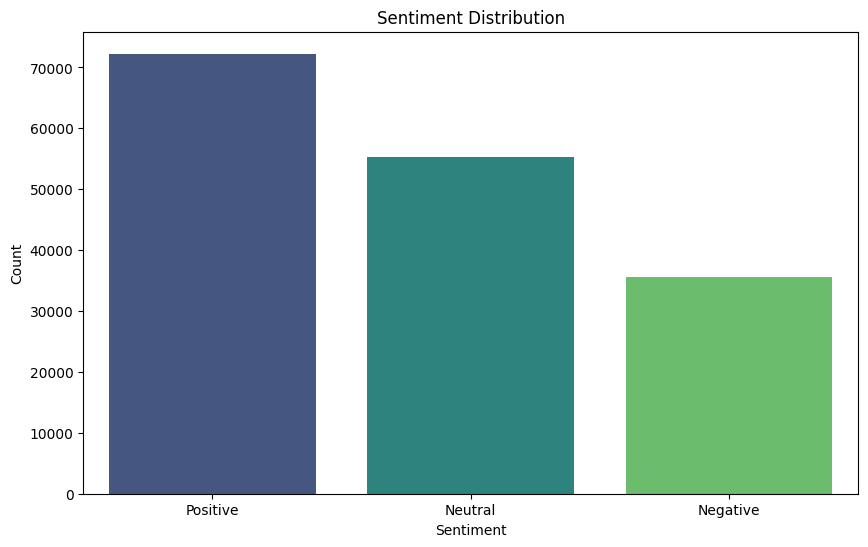

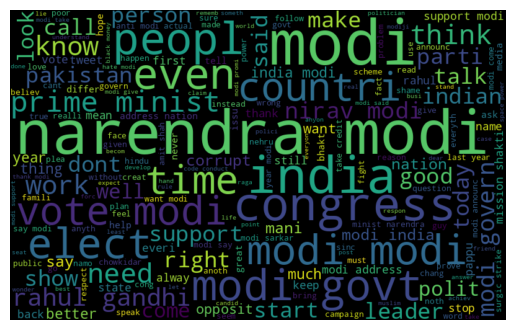

In [18]:
# Bar plot for sentiment distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=df['sentiment'].value_counts().index, y=df['sentiment'].value_counts().values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Word Cloud for all tweets
all_words = " ".join([sentence for sentence in df['clean_text']])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Feature Extraction and Model Training

In [19]:
# Feature extraction
bow_vector = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vector.fit_transform(df['clean_text'])

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(bow, df['category'], test_size=0.25, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(x_train, y_train)

# Evaluation
pred = model.predict(x_test)
print("F1 Score:", f1_score(y_test, pred, average='weighted'))
print("Accuracy Score:", accuracy_score(y_test, pred))

F1 Score: 0.7395326885485423
Accuracy Score: 0.7419742784213627


Confusion Matrix

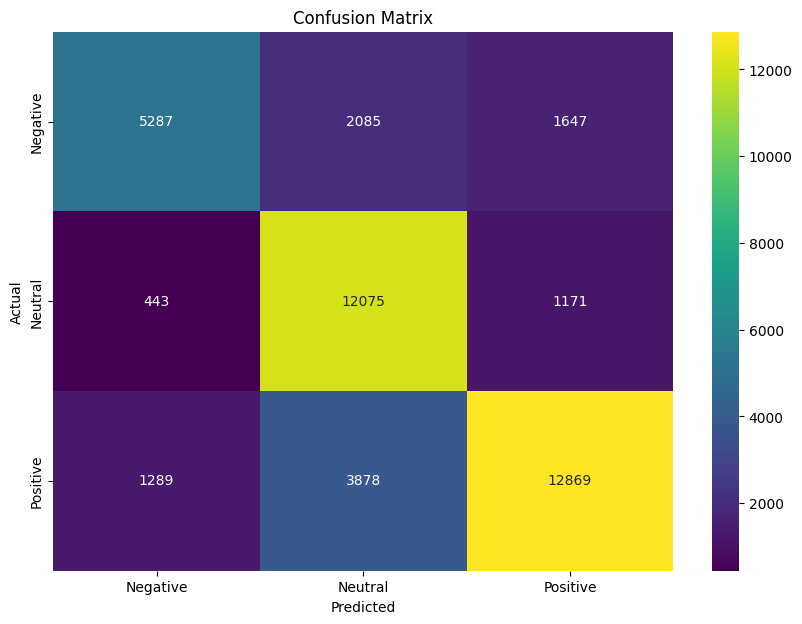

In [12]:
conf_matrix = confusion_matrix(y_test, pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

User Input and Prediction

In [13]:
# Function to preprocess user input tweet
def preprocess_user_input(tweet):
    tweet = tweet.lower()
    tweet = re.sub("[^a-zA-Z#]", " ", tweet)
    tweet = " ".join([w for w in tweet.split() if len(w) > 3])
    tweet = ' '.join([stemmer.stem(word) for word in tweet.split() if word not in stop_words])
    return tweet

# Example usage:
user_tweet = input("Enter your tweet: ")
clean_user_tweet = preprocess_user_input(user_tweet)

# Transform the user input using the CountVectorizer
user_tweet_bow = bow_vector.transform([clean_user_tweet])

# Predict using the trained Logistic Regression model
prediction = model.predict(user_tweet_bow)

# Map prediction to sentiment label
sentiment_label = {1: 'Positive', 0: 'Neutral', -1: 'Negative'}
predicted_sentiment = sentiment_label[prediction[0]]
print("Predicted Sentiment:", predicted_sentiment)

Enter your tweet: Modi is a good orator.
Predicted Sentiment: Positive


Word Cloud for each Sentiment

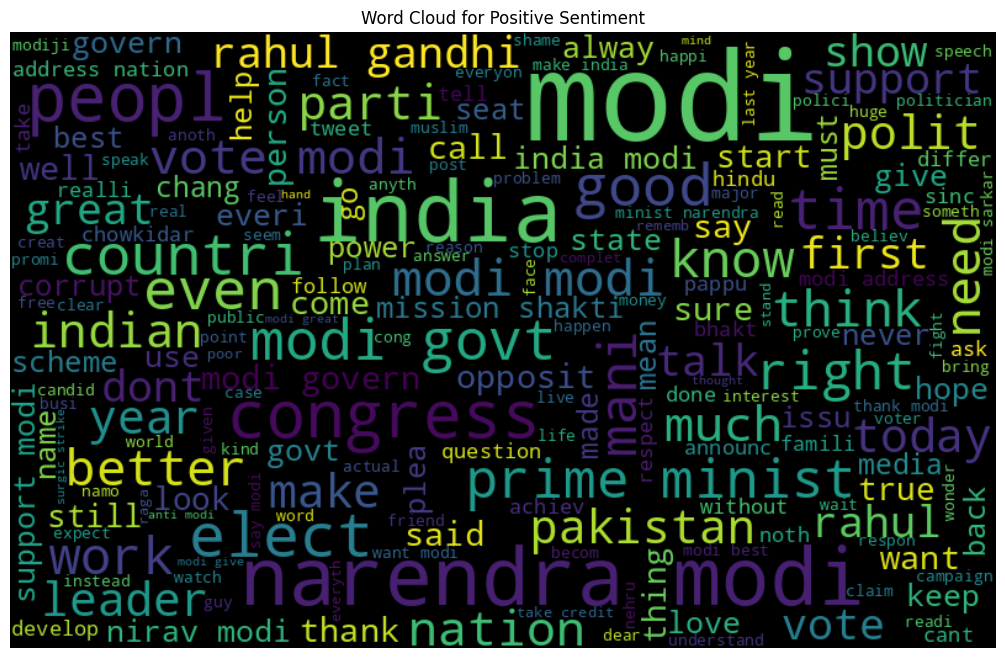

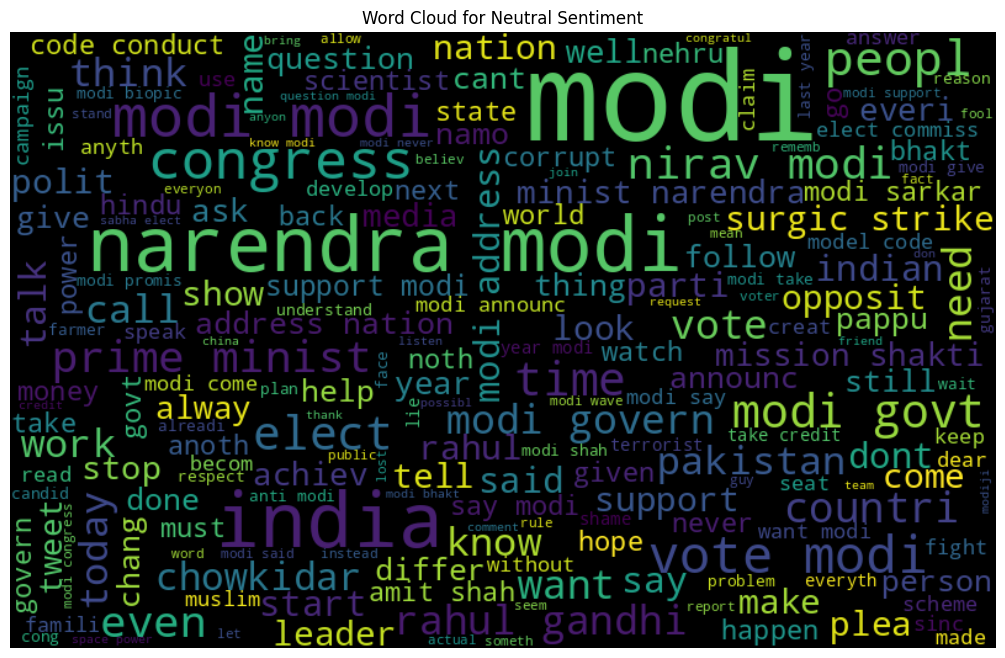

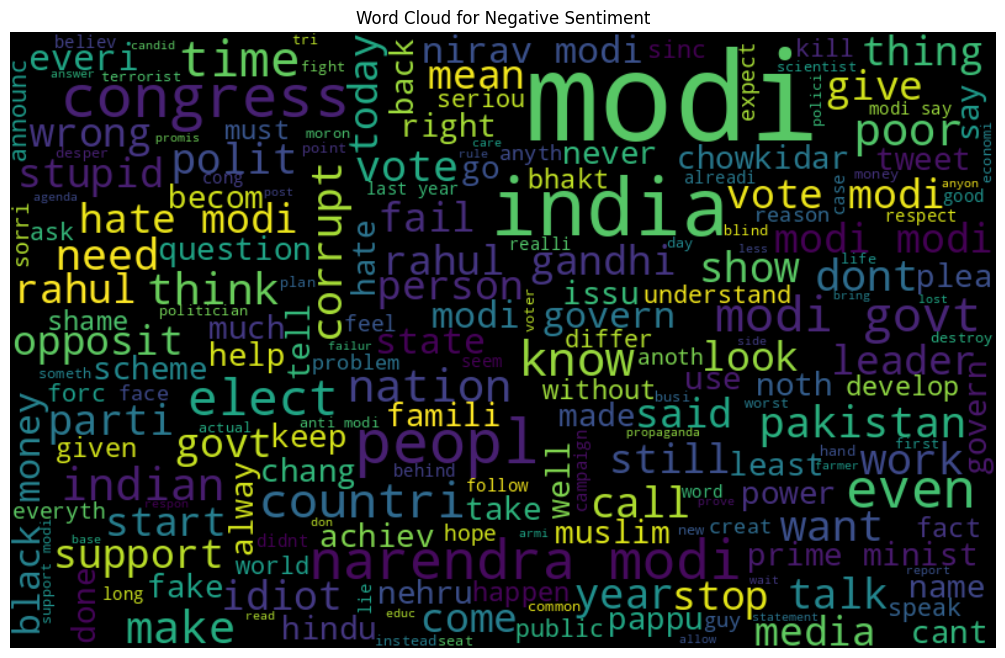

In [14]:
# Word Cloud for Positive Sentiment
all_words_positive = " ".join([sentence for sentence, label in zip(df['clean_text'], df['category']) if label == 1])
wordcloud_positive = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words_positive)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()

# Word Cloud for Neutral Sentiment
all_words_neutral = " ".join([sentence for sentence, label in zip(df['clean_text'], df['category']) if label == 0])
wordcloud_neutral = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words_neutral)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Sentiment')
plt.show()

# Word Cloud for Negative Sentiment
all_words_negative = " ".join([sentence for sentence, label in zip(df['clean_text'], df['category']) if label == -1])
wordcloud_negative = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words_negative)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment')
plt.show()